<h1><center><font size="15">APRENDIZAJE AUTOMÁTICO (ISI-306)</font></center></h1>

<img src="Logo_1.jpg" width=800 height=600 />

<h1><center><font size="5">EXAMEN DE LABORATORIO 1</font></center></h1>

# CASO 3 - RENTA Y VENTA

#### ING: K. MARLON SOZA MAMANI

Importación de librerías:

In [1]:
# Importamos las librerias de OpenCV
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Tenga en cuenta:

Tres estudiantes de posgrado extranjeros buscan un lugar donde vivir mientras realizan sus estudios en el pais de Brasil. Todos forman parte de un intercambio universitario pagado (a excepción del alojamiento) y desean comprar un inmueble donde quedarse mientras terminan su programa.

- El primer estudiante ha sido asignado a una universidad de Río de Janeiro. Así mismo busca comprar un apartamento pequeño de alrededor de 60 metros cuadrados.


- El segundo estudiante tiene la opción de seleccionar la universidad de estudio, por lo cual busca comprar un apartamento en una ciudad de la región sur. Así mismo, planea viajar con su familia por lo cual busca un tamaño de 105 metros cuadrados.


- El tercer estudiante busca establecerse inmediatamente después de haber llegado a la ciudad, por lo cual busca más bien comprar un casa de alrededor 125 metros cuadrados. Se le ha asignado la cuidad de Santa Catarina

¿Cuál sería el precio recomendando para cada caso?


Utilice el datasheet de la siguiente pagina:

https://www.kaggle.com/datasets/ashishkumarjayswal/brasil-real-estate


## Segundo estudiante 

In [2]:
# --- Inserte código aqui
# --- Inserte código aqui
data = pd.read_csv('brasil.csv')

apartmentSur_data = data[(data["property_type"] == "apartment") & (data["region"] == "South")  & (data["state"] == "Santa Catarina")]

print(apartmentSur_data)

      Unnamed: 0 property_type           state region        lat        lon  \
6748        6749     apartment  Santa Catarina  South -26.985996 -48.636383   
6749        6750     apartment  Santa Catarina  South -26.985996 -48.636383   
6750        6751     apartment  Santa Catarina  South -26.966631 -48.636383   
6751        6752     apartment  Santa Catarina  South -26.966631 -48.636383   
6752        6753     apartment  Santa Catarina  South -27.633241 -48.655876   
...          ...           ...             ...    ...        ...        ...   
9741        9742     apartment  Santa Catarina  South -26.966631 -48.636383   
9743        9744     apartment  Santa Catarina  South -26.921036 -48.653305   
9745        9746     apartment  Santa Catarina  South -26.997210 -48.633877   
9746        9747     apartment  Santa Catarina  South -26.975040 -48.646408   
9747        9748     apartment  Santa Catarina  South -27.594744 -48.541233   

      area_m2   price_brl  
6748    170.0   748595.

In [3]:
###
apartmentSur_data=apartmentSur_data.dropna()

In [4]:
matriz = np.array(apartmentSur_data)
columna_deseada = matriz[:, 2]
valores_unicos = np.unique(columna_deseada)
print("Valores únicos en la primera columna:", valores_unicos)

Valores únicos en la primera columna: ['Santa Catarina']


In [5]:
# --- Obtener datos de las columnas (solo valores)
X = apartmentSur_data.values[:,6]
Y = apartmentSur_data.values[:,7]/1000
print(Y)

#print("Número de observaciones: "+str(len(Y)))

[748.59573 1377.41618 1297.56598 ... 988.1464 274.4851 759.6120999999999]


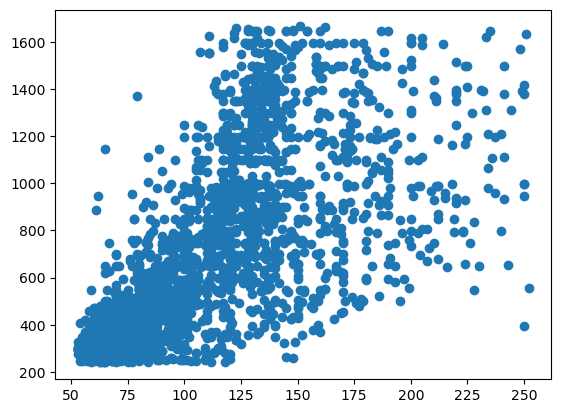

In [6]:
## Grafica con X sin empezar de cero
plt.scatter(X , Y)
plt.show()

In [7]:
w0 = 0 #Interceptor
w1 = 0 #Pendiente

n = 0.00000001 #Tamaño de paso
epochs = 60000 #Numero de Iterraciones
N = float(len(X)) #Numero de elementos en X

Error = [0]*epochs
T = np.arange(1, epochs+1)

In [8]:
#gradiente descendiente
for i in range(epochs):
    Y_pred = w0 + w1*X #Modelo predecido
    Error[i] = sum((Y-Y_pred)**2)
    D_w0 = (-2)*sum(Y-Y_pred)
    D_w1 = (-2)*sum((Y-Y_pred)*X)
    w0 = w0 - n*D_w0
    w1 = w1 - n*D_w1

In [9]:
print(w0,w1)

12.918107560850142 6.401824727123218


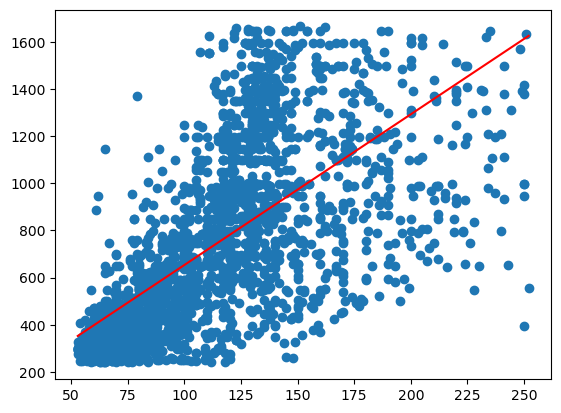

<Figure size 3500x1500 with 0 Axes>

In [10]:
Y_pred = w0 + w1 * X  # 

plt.scatter(X, Y)
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red')
#plt.plot(X, Y_pred, color='red')
plt.figure(figsize=(35, 15))
plt.show()


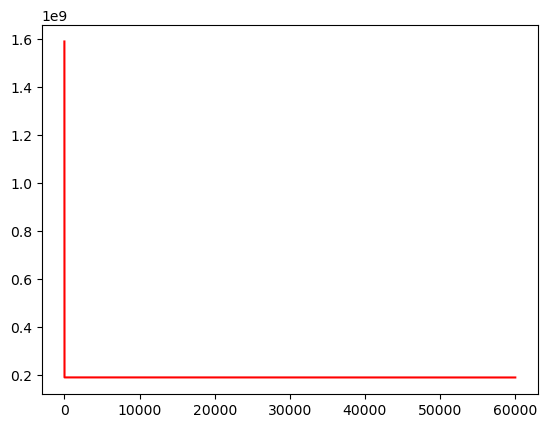

191641359.84369594


In [11]:
plt.plot(T, Error, '-r')
plt.show()
Min_E = min(Error)
print(Min_E)

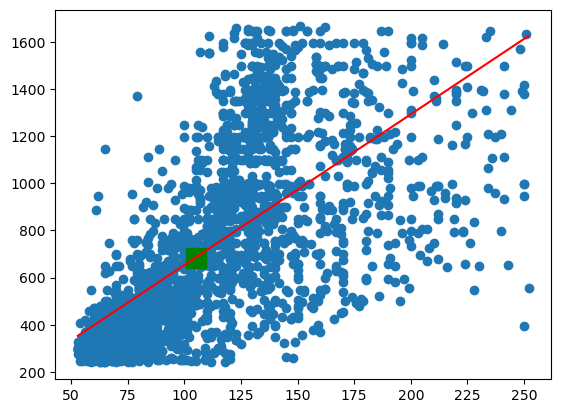

685.109703908788


In [12]:
X_point = 105
Y_point = w0 + w1*X_point

plt.scatter(X, Y)
plt.plot(X_point, Y_point, 'gs',markersize = 15)
plt.plot([min(X), max(X)],[min(Y_pred),max(Y_pred)],color='red')
plt.show()

print(Y_point)

In [14]:
res=Y_point*1000

In [16]:
print(res)

685109.703908788


# Respuesta: 685109.703908788

In [13]:
matriz = np.array(data)
columna_deseada = matriz[:, 1]
valores_unicos = np.unique(columna_deseada)
print("Valores únicos en la primera columna:", valores_unicos)

Valores únicos en la primera columna: ['apartment' 'house']
